In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import chi2_contingency


In [2]:
# Descargar y cargar el dataset
url = "https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv"
df = pd.read_csv(url)




In [3]:
# Función para exploración de los datos
def df_exploration(df):
    # Revisión básica de los datos
    print(df.info())  # Para revisar los tipos de datos
    print(f"\nValores duplicados: {df.duplicated().sum()}")  # Revisa si hay duplicados en los datasets
    print(f"\nValores nulos: \n{df.isnull().sum()}") # Revisar valores nulos
    print (f"\nValores unicos: \n{df.nunique()}") # Revisar valores unicos
    return df

In [4]:
df_exploration(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Pregunta 1: Nulos en la columna "price"

In [5]:
# Verificar los valores nulos en 'price'
null_count = df['Price'].isna().sum()
total_count = len(df)

# Calcular porcentaje de pérdida
percentage_loss = (null_count / total_count) * 100
print(f"Porcentaje de pérdida de datos al eliminar los valores nulos en 'price': {percentage_loss:.2f}%")

Porcentaje de pérdida de datos al eliminar los valores nulos en 'price': 21.83%


## Pregunta 2: Tipo más común de propiedad

In [6]:
# Contar los tipos de propiedad y calcular el porcentaje
property_counts = df['Type'].value_counts(normalize=True) * 100
property_counts

h    68.795364
u    20.934102
t    10.270534
Name: Type, dtype: float64

## Pregunta 3: Representación gráfica del tipo de propiedad

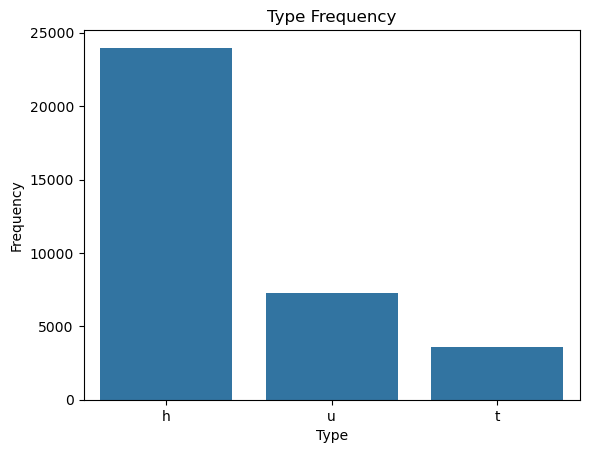

In [7]:
# Crear un gráfico de barras para mostrar la frecuencia de cada tipo de propiedad
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Type Frequency')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

## Pregunta 4: Relación entre habitaciones y precio

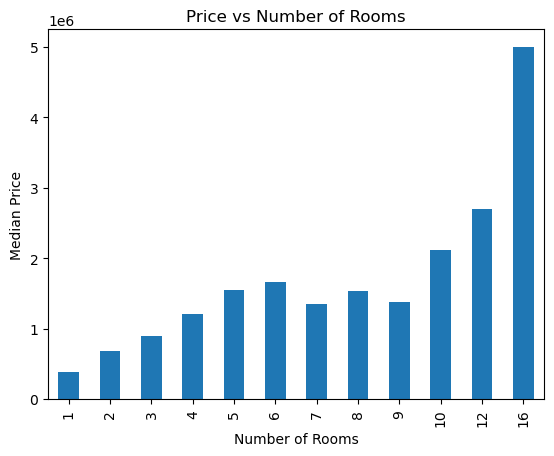

In [8]:
# Agrupar por número de habitaciones y calcular la mediana del precio
rooms_vs_price = df.groupby('Rooms')['Price'].median()

# Graficar la relación
rooms_vs_price.plot(kind='bar')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.title('Price vs Number of Rooms')
plt.show()

## Pregunta 5: Coeficiente de correlación de Spearman: precio y número de habitaciones

In [9]:
# Eliminar filas con valores nulos en 'Price' o 'Rooms'
df_clean = df[['Price', 'Rooms']].dropna()

# Calcular el coeficiente de correlación de Spearman
spearman_corr, _ = spearmanr(df_clean['Price'], df_clean['Rooms'])
print(f'Coeficiente de correlación de Spearman: {spearman_corr:.2f}')

Coeficiente de correlación de Spearman: 0.50


## Pregunta 6: Relación entre la distancia al centro y el precio

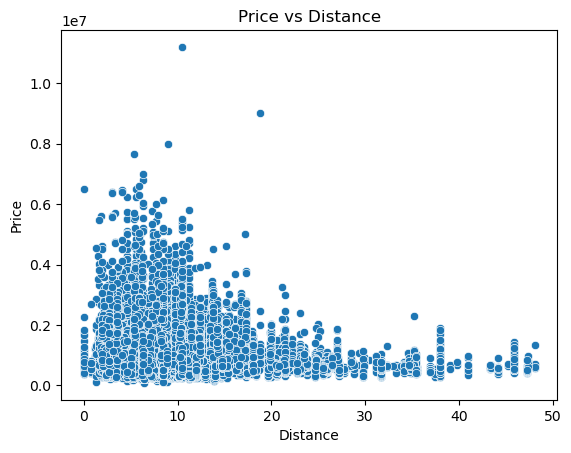

Coeficiente de correlación de Spearman: -0.19
Coeficiente de correlación de pearsonr: -0.21


In [10]:
# Crear un scatter plot de la distancia vs precio
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title('Price vs Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

# Eliminar filas con valores nulos en 'Price' o 'Distance'
df_clean = df[['Price', 'Distance']].dropna()

# Calcular la correlación de Spearman
distance_vs_price_corr, _ = spearmanr(df_clean['Distance'], df_clean['Price'])
print(f'Coeficiente de correlación de Spearman: {distance_vs_price_corr:.2f}')

# Calcular la correlación de pearsonr
distance_vs_price_corr, _ = pearsonr(df_clean['Distance'], df_clean['Price'])
print(f'Coeficiente de correlación de pearsonr: {distance_vs_price_corr:.2f}')

## Pregunta 7: Relación entre tamaño y precio

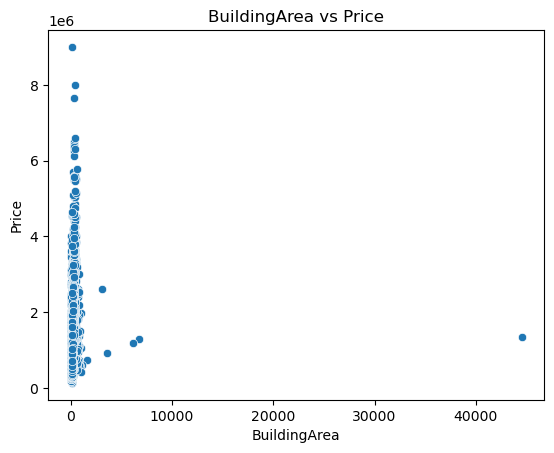

Coeficiente de correlación de spearmanr: 0.56
Coeficiente de correlación de pearsonr: 0.10


In [11]:
# Crear un scatter plot de la distancia vs precio
sns.scatterplot(data=df, x='BuildingArea', y='Price')
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('BuildingArea vs Price')
plt.show()

# Eliminar filas con valores nulos en 'Price' o 'BuildingArea'
df_clean = df[['Price', 'BuildingArea']].dropna()


# Calcular el coeficiente de correlación de Spearman
property_size_price_corr, _ = spearmanr(df_clean['BuildingArea'], df_clean['Price'])
print(f'Coeficiente de correlación de spearmanr: {property_size_price_corr:.2f}')

# Calcular el coeficiente de correlación de pearsonr
property_size_price_corr, _ = pearsonr(df_clean['BuildingArea'], df_clean['Price'])
print(f'Coeficiente de correlación de pearsonr: {property_size_price_corr:.2f}')

## Pregunta 8:  Landsize vs precio

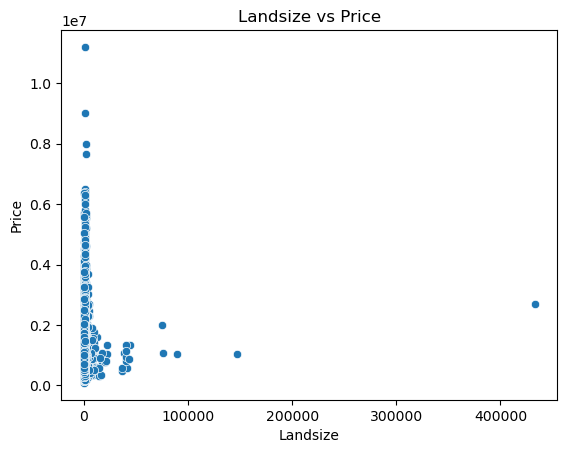

Coeficiente de correlación de Spearman: 0.28


In [12]:
# Crear scatter plot de 'Landsize' vs 'Price'
sns.scatterplot(data=df, x='Landsize', y='Price')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.title('Landsize vs Price')
plt.show()

# Eliminar filas con valores nulos en 'Price' o 'Landsize'
df_clean = df[['Price', 'Landsize']].dropna()

# Calcular el coeficiente de correlación de Spearman
property_size_price_corr, _ = spearmanr(df_clean['Landsize'], df_clean['Price'])
print(f'Coeficiente de correlación de Spearman: {property_size_price_corr:.2f}')

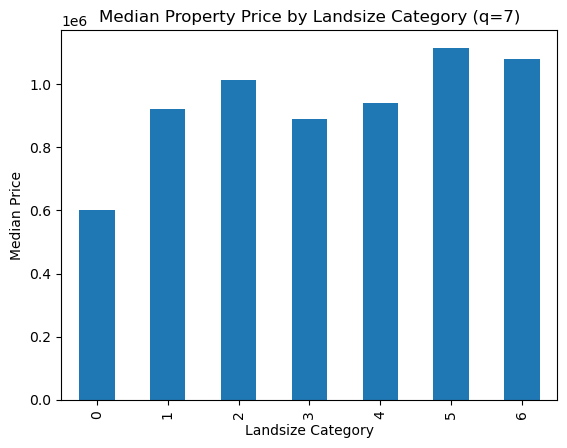

In [13]:
# Separar la variable 'Landsize' en 7 categorías usando cuantiles
df_clean['LandsizeCategory'] = pd.qcut(df_clean['Landsize'], q=7, labels=False)

# Calcular el precio mediano por cada categoría de tamaño de la tierra
landsize_median_price = df_clean.groupby('LandsizeCategory')['Price'].median()

# Graficar la relación entre categoría de tamaño y precio mediano
landsize_median_price.plot(kind='bar')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.title('Median Property Price by Landsize Category (q=7)')
plt.show()

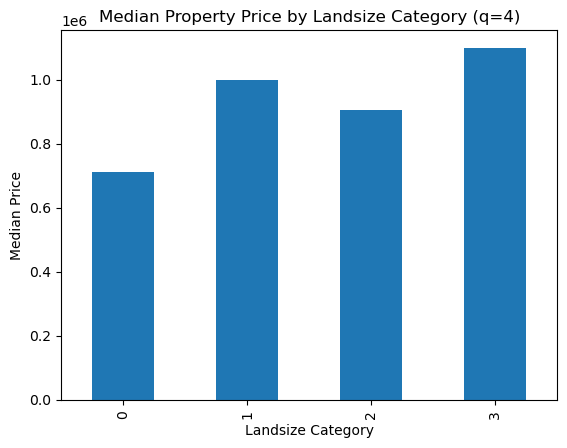

In [14]:
# Separar la variable 'Landsize' en 4 categorías usando cuantiles
df_clean['LandsizeCategory'] = pd.qcut(df_clean['Landsize'], q=4, labels=False)

# Calcular el precio mediano por cada categoría de tamaño de la tierra
landsize_median_price = df_clean.groupby('LandsizeCategory')['Price'].median()

# Graficar la relación entre categoría de tamaño y precio mediano
landsize_median_price.plot(kind='bar')
plt.xlabel('Landsize Category')
plt.ylabel('Median Price')
plt.title('Median Property Price by Landsize Category (q=4)')
plt.show()

## Pregunta 9: Outliers

In [15]:
# Eliminar filas con valores nulos en 'Price'
df_clean = df[['Price']].dropna()

In [16]:
# Calcular cuartiles y rango intercuartil
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers usando el método de Tukey con umbral de 1.5
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_clean[(df_clean['Price'] < lower_bound) | (df_clean['Price'] > upper_bound)]
outlier_percentage = (len(outliers) / len(df_clean)) * 100

print(f'Porcentaje de propiedades identificadas como outliers: {outlier_percentage:.2f}%')

Porcentaje de propiedades identificadas como outliers: 4.69%


In [17]:
# df sin outliers
df_clean_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

## Pregunta 10: Distribución del precio

Skewness: 2.59
Kurtosis: 13.10


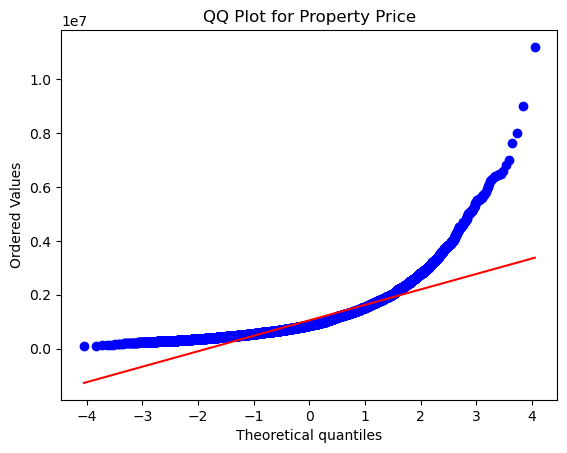

In [18]:
# Calcular skewness y kurtosis
skewness = df_clean['Price'].skew()
kurtosis = df_clean['Price'].kurtosis()

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

# Crear un QQ plot para comparar con una distribución normal
stats.probplot(df_clean['Price'], dist="norm", plot=plt)
plt.title('QQ Plot for Property Price')
plt.show()

## Pregunta 11: Prueba de Normalidad (Kolmogorov-Smirnov)

In [19]:
# Realizar la prueba de Kolmogorov-Smirnov para la normalidad
ks_statistic, p_value = kstest(df_clean['Price'], 'norm')

print(f'KS Statistic: {ks_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

KS Statistic: 1.0000
p-value: 0.0000


## Pregunta 12: Precios vs tipos de propiedad

In [20]:
# Eliminar filas con valores nulos en 'Price' o 'Type'
df_clean = df[['Price', 'Type']].dropna()

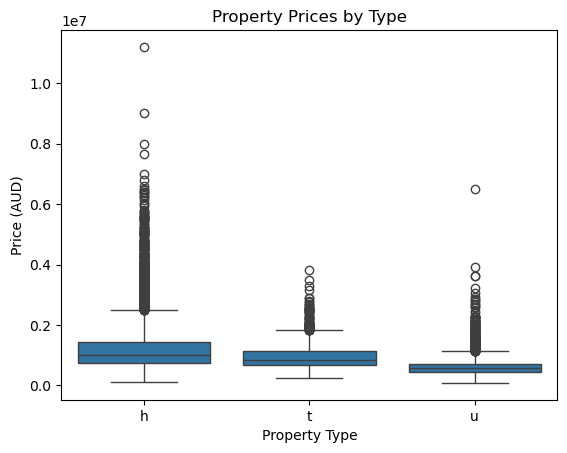

In [21]:
# Crear un box plot para ver las diferencias de precios entre tipos de propiedades
sns.boxplot(data=df_clean, x='Type', y='Price')
plt.title('Property Prices by Type')
plt.xlabel('Property Type')
plt.ylabel('Price (AUD)')
plt.show()

## Pregunta 13: Región con el precio medio más alto y más bajo

In [22]:
# Agrupar por 'Regionname' y calcular el precio mediano
median_prices_by_region = df.groupby('Regionname')['Price'].median().sort_values(ascending=False)

# Mostrar las regiones con el precio mediano más alto y más bajo
print(median_prices_by_region)

Regionname
Southern Metropolitan         1250000.0
Eastern Metropolitan          1015000.0
South-Eastern Metropolitan     811250.0
Northern Metropolitan          752500.0
Western Metropolitan           750000.0
Eastern Victoria               679000.0
Northern Victoria              565000.0
Western Victoria               412125.0
Name: Price, dtype: float64


## Pregunta 14: Chi-Cuadrado y Cramer's V

In [23]:
# Eliminar filas con valores nulos en 'Price' o 'Regionname'
df_clean = df[['Price', 'Regionname']].dropna()

In [24]:
# Categorizar los precios en 5 rangos distintos usando cuartiles
df_clean['PriceCategory'] = pd.qcut(df_clean['Price'], q=5, labels=False)

# Crear una tabla de contingencia entre 'Regionname' y 'PriceCategory'
contingency_table = pd.crosstab(df_clean['Regionname'], df_clean['PriceCategory'])

# Realizar el test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calcular el coeficiente de Cramer's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f'Chi-squared test p-value: {p:.4f}')
print(f"Cramer's V: {cramers_v:.4f}")

Chi-squared test p-value: 0.0000
Cramer's V: 0.2293


## Pregunta 15: Aumento o Disminución del Precio

In [25]:
# Convertir la columna 'Date' a formato datetime y extraer el año
df['Year'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.year

# Agrupar por año y calcular el precio mediano para cada año
median_prices_by_year = df.groupby('Year')['Price'].median()

# Mostrar el precio mediano para el primer y el último año
earliest_year = median_prices_by_year.index.min()
latest_year = median_prices_by_year.index.max()
earliest_price = median_prices_by_year.loc[earliest_year]
latest_price = median_prices_by_year.loc[latest_year]

# Calcular el porcentaje de aumento o disminución
percentage_change = ((latest_price - earliest_price) / earliest_price) * 100
print(f'Percentage change in median price: {percentage_change:.2f}%')

Percentage change in median price: -5.48%


## Pregunta 16: Mes con más Ventas

In [26]:
# Extraer el mes de la columna 'Date'
df['Month'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.month

# Filtrar solo las ventas de casas (Type == 'h')
houses_only = df[df['Type'] == 'h']

# Contar el número de ventas por mes
sales_by_month = houses_only['Month'].value_counts().sort_index()

# Mostrar el mes con mayor venta de casas
most_sales_month = sales_by_month.idxmax()
print(f'The month with the most house sales is: {most_sales_month}')

The month with the most house sales is: 11
